In [1]:
# Setting Up

# Data analysis and wrangling
import os
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split & Scaling Dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA 

# Regression Learning Techniques
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Performance evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
# Ignore the matching warnings to make output windows clean
import warnings
warnings.filterwarnings("ignore")

# Dataset Loading and Analysis 

### Dataset loading 

In [3]:
# Read File & Input data into Dataframe (by using python Pandas packages to work with datasets)
path = "."                                         # Selecting the current folder where the dataset is 
filename_read = os.path.join(path, "SM_Data.csv")
df = pd.read_csv(filename_read)                    # Acquiring the datasets into Pandas Dataframes

# Rename the columns for easy understanding 
df.rename(columns = {'I_y':'Load Current',
                     'PF':'Power Factor',
                     'e_PF':'Power Factor Error',
                     'd_if':'Excitation Current Change',
                     'I_f':'Excitation Current'}, inplace = True)

# Restyle the table and shows the first five row to check the raw data 
df.head().style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'gray'})

,Load Current,Power Factor,Power Factor Error,Excitation Current Change,Excitation Current
0,3.000000,0.660000,0.340000,0.383000,1.563000
1,3.000000,0.680000,0.320000,0.372000,1.552000
2,3.000000,0.700000,0.300000,0.360000,1.540000
3,3.000000,0.720000,0.280000,0.338000,1.518000
4,3.000000,0.740000,0.260000,0.317000,1.497000


In [4]:
# Exploratory Data Analysis(EDA) - Find characteristics of the data

# To discover the features of original dataset
print(df.info())
print(f"Name of each columns in the dataset: {df.columns}")                    
print(f"Number of columns in the dataset: {len(df.columns)}")
# Five features in the datasets and all the features are numerical and continuous.

# To evaluate the missing, corrupt or misleading data
print(f"Number of missing values in each column: {df.isnull().sum()}")   
print(f"Number of duplicated values in each column: {df.duplicated().sum()}") 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Load Current               557 non-null    float64
 1   Power Factor               557 non-null    float64
 2   Power Factor Error         557 non-null    float64
 3   Excitation Current Change  557 non-null    float64
 4   Excitation Current         557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB
None
Name of each columns in the dataset: Index(['Load Current', 'Power Factor', 'Power Factor Error',
       'Excitation Current Change', 'Excitation Current'],
      dtype='object')
Number of columns in the dataset: 5
Number of missing values in each column: Load Current                 0
Power Factor                 0
Power Factor Error           0
Excitation Current Change    0
Excitation Current           0
dtype: int64
Number of duplicated values in eac

In general, Dataset are organised and no missing, corrupt or misleading data 

### Basic Statistics of inital data

In [5]:
# EDA - Basic statistics for each categorical columns (two ways: for loop and library)

# For loop to show the statistic characteristics about each feature in a string style
headers = list(df.columns.values)                                             
fields = []
for field in headers:
    fields.append({'name':field, 'mean':df[field].mean(),
                   'var':df[field].var(),'sdev':df[field].std()})
for field in fields:
    print(field) 

# Table shows the essential Statistic characteristics about each feature
df.describe().T.style.set_properties(**{'background-color': 'black',   
                           'color': 'white',
                           'border-color': 'gray'})

{'name': 'Load Current', 'mean': 4.499820466786356, 'var': 0.8028596799400701, 'sdev': 0.8960243746350153}
{'name': 'Power Factor', 'mean': 0.8252962298025146, 'var': 0.010800496622450723, 'sdev': 0.10392543780254536}
{'name': 'Power Factor Error', 'mean': 0.17470377019748645, 'var': 0.010800496622450688, 'sdev': 0.10392543780254519}
{'name': 'Excitation Current Change', 'mean': 0.35065888689407526, 'var': 0.03260404890019761, 'sdev': 0.18056591289664173}
{'name': 'Excitation Current', 'mean': 1.530658886894076, 'var': 0.03260404890019763, 'sdev': 0.18056591289664178}


,count,mean,std,min,25%,50%,75%,max
Load Current,557.000000,4.499820,0.896024,3.000000,3.700000,4.500000,5.300000,6.000000
Power Factor,557.000000,0.825296,0.103925,0.650000,0.740000,0.820000,0.920000,1.000000
Power Factor Error,557.000000,0.174704,0.103925,0.000000,0.080000,0.180000,0.260000,0.350000
Excitation Current Change,557.000000,0.350659,0.180566,0.037000,0.189000,0.345000,0.486000,0.769000
Excitation Current,557.000000,1.530659,0.180566,1.217000,1.369000,1.525000,1.666000,1.949000


### Outlier Checking

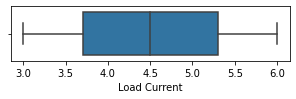

Number of Outlier: 0


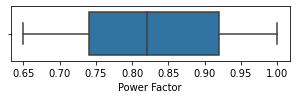

Number of Outlier: 0


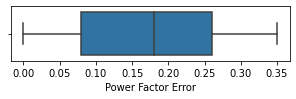

Number of Outlier: 0


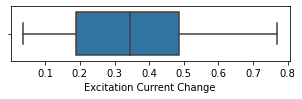

Number of Outlier: 0


In [6]:
# EDA - Outliers Checking (as regression models are sensitive to outliers)

# Function to determine the outlier. (IQR method)
outlier=[]
def IQR_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower = q1-(iqr*1.5)
    upper = q3+(iqr*1.5)
    for i in df:
        if i>upper or i<lower:
            outlier.append(i)
    print(f"Number of Outlier: {len(outlier)}")

# Function to visulize the outlier. (Boxplot)
def Box_plots(df):
    plt.figure(figsize=(5, 1))
    sns.boxplot(df)
    plt.show()

Box_plots(df['Load Current'])
IQR_outlier(df['Load Current'])

Box_plots(df['Power Factor'])
IQR_outlier(df['Power Factor'])

Box_plots(df['Power Factor Error'])
IQR_outlier(df['Power Factor Error'])

Box_plots(df['Excitation Current Change'])
IQR_outlier(df['Excitation Current Change'])



The data are pretty straightforward without outliers. Hence, The function used to remove the outlier is unnecessary for this dataset

### Correlation Matrix

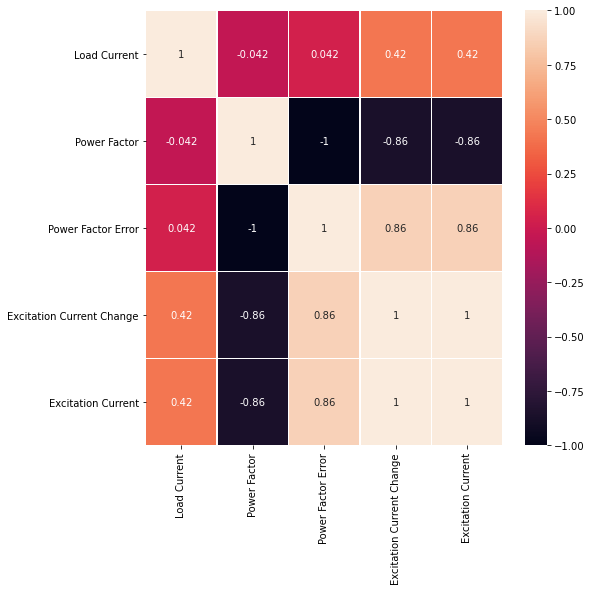

In [7]:
# EDA - Correlation Matrix - to discover the correlation between each feature 
plt.subplots(figsize=(8, 8))           # Adjust the figure size
corrMatrix = df.corr()                 # Calcualte the correlation by .corr function
sns.heatmap(corrMatrix,annot=True,linewidths=.5)  # 'annot' is True showing the values in each cell, 'linewidths' adjust distance between each cell
plt.show()
# Correlation Matrix shows that Excitation Current is perfectly correlated with Excitation Current Change.
# The lowest correlation score is 0.42 for Load current and Excitation Current.

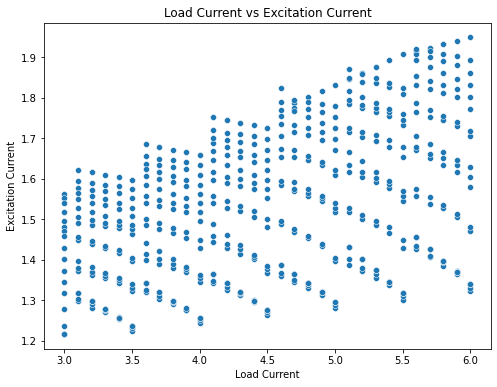

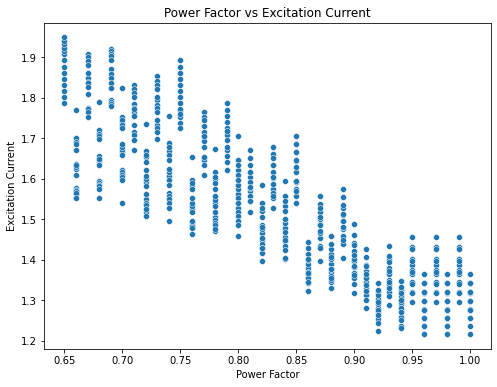

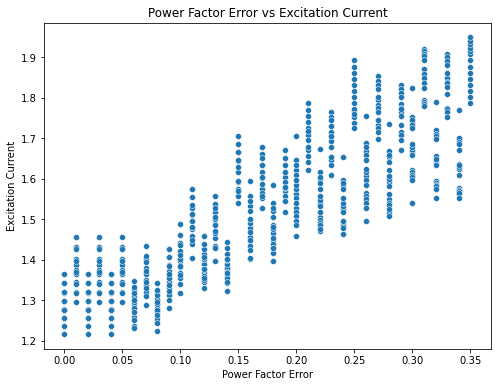

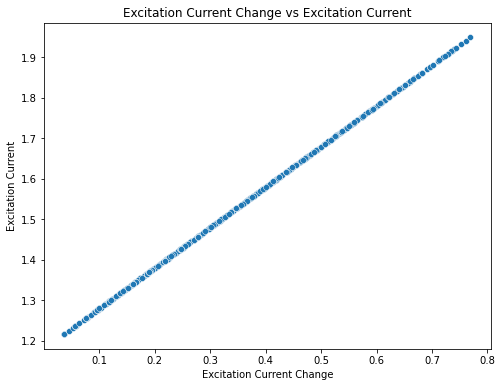

In [8]:
# EDA - Visualizing Relationship between all independent features to the target variable by using scatterplot
# Relationship between Load Current and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))                       
plt.title('Load Current vs Excitation Current')
sns.scatterplot(x='Load Current',y='Excitation Current',data=df)       #Scatterplot diagram
plt.show()

# Relationship between Power Factor and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Power Factor vs Excitation Current')
sns.scatterplot(x='Power Factor',y='Excitation Current',data=df)
plt.show()


# Relationship between Power Factor Error and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Power Factor Error vs Excitation Current')
sns.scatterplot(x='Power Factor Error',y='Excitation Current',data=df)
plt.show()

# Relationship between Excitation Current Change and the target feature, Excitation Current
plt.subplots(figsize=(8, 6))   
plt.title('Excitation Current Change vs Excitation Current')
sns.scatterplot(x='Excitation Current Change',y='Excitation Current',data=df)
plt.show()



The relationship between Load Current and Excitation Current is positively linear
The relationship between Power Factor and Excitation Current is negatively linear
The relationship between Power Factor Error and Excitation Current is positively linear
The relationship Excitation Current Change and Excitation Current is perfectly linear



# Splitting the dataset into the training set and testing set

In [9]:
#Split DataSet

# Extract Independent Features (Load Current, Power Factor, Power Factor Error and Excitation Current Change)
X = df.drop(['Excitation Current Change','Excitation Current'],axis=1)    
# Extract Target Feature (Excitation Current)
y = df['Excitation Current']
# Omit Excitation Current Change as correlation between excitation current and excitation current change are perfect

# Split the dataset into training and testing set (30% testing set and 70% training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=42) # 'random_state' maintain the same values in train and test datasets eveytime 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Feature Scaling 
scaler = StandardScaler() # Using standardscaler to bring every feature in the same footing without any upfront importance & prevent saturate too fast
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


(389, 3)
(168, 3)
(389,)
(168,)


In [10]:
# Dimensionality Reduction by using Principal Component Analysis
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate
pca=PCA(n_components=1)   # Transformed data into one dimension of the principal component
pca.fit(X_train_scaled)
pca.fit(X_test_scaled)
X_pca_train=pca.transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
print("original shape:   ", X_train.shape)
print("transformed shape of train data:", X_pca_train.shape)
print("transformed shape of test data:", X_pca_test.shape)

original shape:    (389, 3)
transformed shape of train data: (389, 1)
transformed shape of test data: (168, 1)


# Linear Regression

Root Mean Squared Error_PCA: 0.10719320545957248


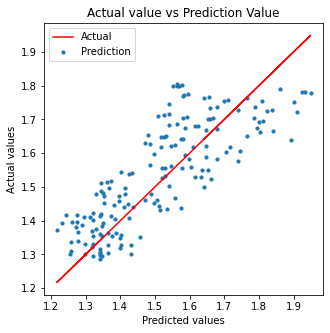

Root Mean Squared Error: 0.06543232258416191


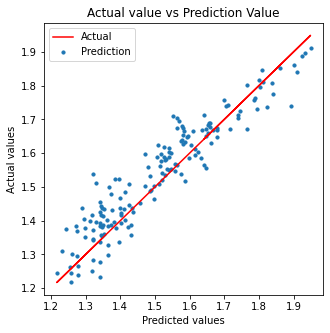

Percentage change without PCA: 38.95851672348816


In [11]:
# First Technology - Linear Regression

# Linear Regression with PCA dimension reduction
model_linear = LinearRegression()        # Creating a linear regression model
model_linear.fit(X_pca_train, y_train)         # Fit the training data into the Linear regression model
prediction=model_linear.predict(X_pca_test)  # Predict the target value by using test data and trained linear regression model 
print('Root Mean Squared Error_PCA:', np.sqrt(mean_squared_error(y_test,prediction)))  # Calculting the RMSE to evaluating the performance of the model
RMSE_PCA = np.sqrt(mean_squared_error(y_test,prediction))
# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

# Linear Regression without PCA dimension reduction
# As the input feature in this task is relatively low, therefore, trying to not reduce the dimension in order to increase the accuracy of the model
model_linear = LinearRegression()                   # Creating a linear regression model
model_linear.fit(X_train_scaled, y_train)           # Fit the training data into the Linear regression model
prediction=model_linear.predict(X_test_scaled)      # Predict the target value by using test data and trained linear regression model 
RMSE_linear = np.sqrt(mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))  # Calculting the RMSE to evaluating the performance of the model
# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

print(f"Percentage change without PCA: {(RMSE_PCA-RMSE_linear)/RMSE_PCA*100}")


### Checking Overfitting with different spliting percentage to dataset

In [12]:
# Extract Independent Features (Load Current, Power Factor, Power Factor Error and Excitation Current Change)
X_1 = df.drop(['Excitation Current Change','Excitation Current'],axis=1)    
# Extract Target Feature (Excitation Current)
y_1 = df['Excitation Current']
# Omit Excitation Current Change as correlation between excitation current and excitation current change are perfect

# Split the dataset into training and testing set (50% testing set and 50% training set)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size= 0.5,random_state=42) # 'random_state' maintain the same values in train and test datasets eveytime 


# Feature Scaling 
scaler = StandardScaler() # Using standardscaler to bring every feature in the same footing without any upfront importance & prevent saturate too fast
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.fit_transform(X_test_1)


#Linear Regression
model_linear = LinearRegression()                   # Creating a linear regression model
model_linear.fit(X_train_scaled_1, y_train_1)           # Fit the training data into the Linear regression model
prediction_1=model_linear.predict(X_test_scaled_1)      # Predict the target value by using test data and trained linear regression model 
RMSE_linear = np.sqrt(mean_squared_error(y_test_1,prediction_1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_1,prediction_1)))  # Calculting the RMSE to evaluating the performance of the model

Root Mean Squared Error: 0.06960052211858009


# Decision Tree Regression

Root Mean Squared Error_Tree: 0.05288475790856586


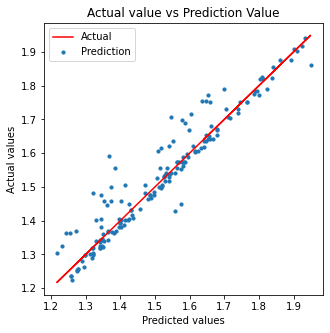

In [13]:
# Second Technology - Decision Tree Regression
model_tree=DecisionTreeRegressor()                 # Creating a tree regression model
model_tree.fit(X_train_scaled, y_train)            # Fit the training data into the tree regression model
prediction=model_tree.predict(X_test_scaled)       # Predict the target value by test data and trained model
RMSE_tree = np.sqrt(mean_squared_error(y_test,prediction))
print('Root Mean Squared Error_Tree:',np.sqrt(mean_squared_error(y_test,prediction)))  # Evaluating the RMSE value 

# Visualize the model performance
plt.subplots(figsize=(5, 5))                             # Change the size of diagram
plt.scatter(y_test,prediction,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')               # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()


# Random Forest Regression

,Number of Estimators,rmse_train_est,rmse_test_est,Difference between Training and Testing Results
0,50,0.034025,0.050630,32.797111
1,100,0.033858,0.052031,34.927870
2,150,0.033175,0.050914,34.840999
3,200,0.033519,0.050928,34.183914


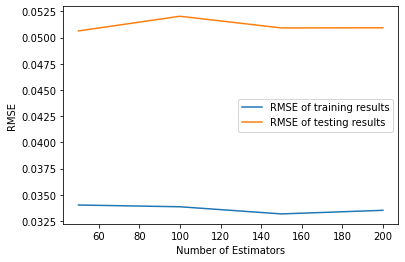

,Max_depth,rmse_train_depth,rmse_test_depth,Difference between Training and Testing Results
0,1,0.103864,0.103389,-0.459058
1,2,0.072003,0.072981,1.340570
2,3,0.045811,0.047891,4.344528
3,4,0.033433,0.037130,9.957247
4,5,0.024930,0.030392,17.973434
5,6,0.018873,0.027049,30.225144
6,7,0.012942,0.024352,46.855047
7,8,0.009733,0.023131,57.924154
8,9,0.008557,0.022143,61.357744


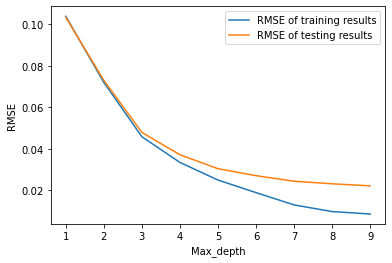

In [14]:
# Third Technology - Random Forest Regression - 1 

# Parameter Determining - As Random Forest Regression requires to set two parameters, finding the optimum values to reach higher accuracy

# Investigate optimum value for number of estimators 
model_rf_est=RandomForestRegressor(max_depth=4) # Setting a fixed value for max_depth in order to find the optimum number of estimators  
rmse_train_est=[]         # Creating a tuple for storage training result 
rmse_test_est=[]          # Creating a tuple for storage test result 
# Creating a for loop to test out the result with different numbers of estimators 
for x in [50,100,150,200]:              # Selecting several target number of estimators
    model_rf_est.n_estimators=x         # Bring each target value back to the model
    model_rf_est.fit(X_train_scaled,y_train)   # Fit the training data to train the model
    prediction_est=model_rf_est.predict(X_test_scaled)  # Predict the target value by using test data and trained model
    train_est=model_rf_est.predict(X_train_scaled)          # Bring the test data back to the model to find the training output
    rmse_train_est.append(np.sqrt(mean_squared_error(y_train,train_est)))     # Storage all the RMSE value about the training result
    rmse_test_est.append(np.sqrt(mean_squared_error(y_test,prediction_est)))  # Storage all the RMSE value about the test result
# Creating a table to show the results 
df_est=pd.DataFrame({'Number of Estimators':[50,100,150,200],'rmse_train_est':rmse_train_est,'rmse_test_est':rmse_test_est})        # Creating a dataframe to storage all the data
df_est['Difference between Training and Testing Results']=(((df_est['rmse_test_est']-df_est['rmse_train_est'])/df_est['rmse_test_est'])*100)    # Calculating the percentage difference between testing and training results
display(df_est)
# Visualize the results
sns.lineplot(x='Number of Estimators',y='rmse_train_est',data=df_est,label='RMSE of training results')  # ploting a a line to show the RMSE change for training results 
sns.lineplot(x='Number of Estimators',y='rmse_test_est',data=df_est,label='RMSE of testing results')    # ploting a a line to show the RMSE change for testing results 
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Investigate optimum value for max_depth
model_rf_depth=RandomForestRegressor(n_estimators=100) # Setting a fixed value for number of estimators in order to find the optimum max_depth,  
# Setting n_estimators = 100 as the RMSE difference between training and testing results are smallest
rmse_train_depth=[]         # Creating a tuple for storage training result 
rmse_test_depth=[]          # Creating a tuple for storage test result 
# Creating a for loop to test out the result with different max_depth
for x in np.arange(1,10,1):              # Selecting several target max_depth from 1 to 10 with step 1 
    model_rf_depth.max_depth=x         # Bring each target value back to the model
    model_rf_depth.fit(X_train,y_train)   # Fit the training data to train the model
    prediction_depth=model_rf_depth.predict(X_test)  # Predict the target value by using test data and trained model
    train_depth=model_rf_depth.predict(X_train)          # Bring the test data back to the model to find the training output
    rmse_train_depth.append(np.sqrt(mean_squared_error(y_train,train_depth)))     # Storage all the RMSE value about the training result
    rmse_test_depth.append(np.sqrt(mean_squared_error(y_test,prediction_depth)))  # Storage all the RMSE value about the test result
# Creating a table to show the results 
df_depth=pd.DataFrame({'Max_depth':np.arange(1,10,1),'rmse_train_depth':rmse_train_depth,'rmse_test_depth':rmse_test_depth})        # Creating a dataframe to storage all the data
df_depth['Difference between Training and Testing Results']=(((df_depth['rmse_test_depth']-df_depth['rmse_train_depth'])/df_depth['rmse_test_depth'])*100)    # Calculating the percentage difference between testing and training results
display(df_depth)
# Visualize the results
sns.lineplot(x='Max_depth',y='rmse_train_depth',data=df_depth,label='RMSE of training results')  # ploting a a line to show the RMSE change for training results 
sns.lineplot(x='Max_depth',y='rmse_test_depth',data=df_depth,label='RMSE of testing results')    # ploting a a line to show the RMSE change for testing results 
plt.ylabel('RMSE')
plt.legend()
plt.show()

Root Mean Squared Error: 0.04573313375830658


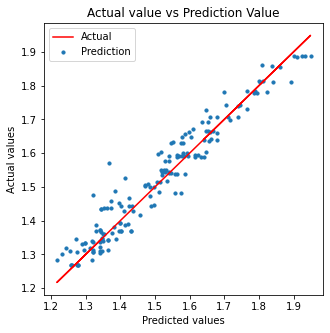

In [15]:
# Third Technology - Random Forest Regression - Final Model

model_rf_final=RandomForestRegressor(n_estimators=100,max_depth=5)    # Creating a final model with decided parameters
model_rf_final.fit(X_train_scaled,y_train)                             # Fit the training data into the random forest regression model
prediction_final=model_rf_final.predict(X_test_scaled)                 # Predict the target value by test data and trained model
RMSE_rf = np.sqrt(mean_squared_error(y_test,prediction_final))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,prediction_final)))  # Evaluating the RMSE value 

# Visualize the model performance
plt.subplots(figsize=(5, 5))                                   # Change the size of diagram
plt.scatter(y_test,prediction_final,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')                     # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()


# Neural Networks

Epoch 00043: early stopping
Epoch 00014: early stopping
Epoch 00021: early stopping
Epoch 00012: early stopping


,Value of Batch,rmse
0,2,0.076540
1,16,0.075641
2,32,0.074416
3,64,0.073506


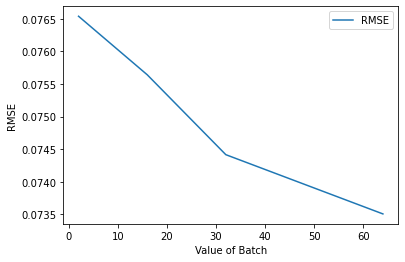

In [21]:
# Fourth Technology - Neural Networks -1 

# Creating Neural Networks
# Set up a keras model & Initialising the NN
model_nn_batch = Sequential()
# Adding the input layer and first hidden layer
model_nn_batch.add(Dense(3,input_dim=X.shape[1], activation='relu'))
# Setting the number of neurons is 3,input_dim is the number of columns of the dataset,the activation function is ReLU in this case
# Adding dropout to prevent overfitting
model_nn_batch.add(Dropout(0.1))    
# Adding second hidden layers with 3 neurons 
model_nn_batch.add(Dense(3,activation='relu'))
# Adding dropout to prevent overfitting
model_nn_batch.add(Dropout(0.1))
# Adding output layer with 1 output value
model_nn_batch.add(Dense(1))
# Compiling the NN 
model_nn_batch.compile(optimizer='adam',loss='mse')
# Chose adam as optimizer for gradient descent, loss function is L2 mean squared error 

#Setting a monitor for early stopping
monitor = EarlyStopping(monitor='loss', min_delta=1e-100, patience=10, verbose=1, mode='auto')
# loss function be monitored,minimum change in the monitored quantity to qualify as an improvement is 0.00001,10 epochs with no improvement after training will be stopped. auto mode is selected  

# As the monitor been seeting for earlystopping, the only parameter left in NN is batch value, creating a for loop to investigate the optimum batch value
rmse =[]                             # Creating a tuple for storage training result 
for x in [2,16,32,64]:              # Selecting several target batch value
    model_nn_batch.max_depth=x         # Bring each target value back to the NN
    model_nn_batch.fit(X_train_scaled,y_train,epochs=200,batch_size=x,callbacks=[monitor],verbose=0)   # Fitting training data to train the NN 
    prediction = model_nn_batch.predict(X_test_scaled)                    # Predict the target value with test data 
    rmse.append(np.sqrt(mean_squared_error(prediction,y_test)))    # calculate the RMSE between predict value and actual value


# Creating a table to show the results 
df_batch=pd.DataFrame({'Value of Batch':[2,16,32,64],'rmse':rmse})        # Creating a dataframe to storage all the data
display(df_batch)
# Visualize the results
sns.lineplot(x='Value of Batch',y='rmse',data=df_batch,label='RMSE')  # ploting a a line to show the RMSE change for training results 
plt.ylabel('RMSE')
plt.show()


Epoch 00064: early stopping
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Final score (RMSE): 0.11854542994093957


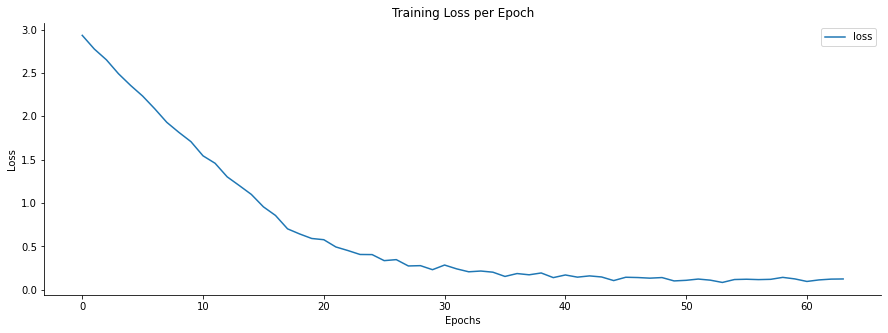

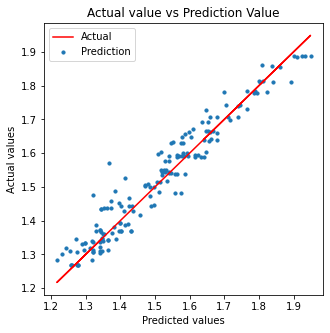

In [17]:
# Fourth Technology - Neural Networks -1 

# Set up a keras model & Initialising the NN
model_nn = Sequential()
# Adding the input layer and first hidden layer
model_nn.add(Dense(3,input_dim=X.shape[1], activation='relu'))
# Setting the number of neurons is 3,input_dim is the number of columns of the dataset,the activation function is ReLU in this case
# Adding dropout to prevent overfitting
model_nn.add(Dropout(0.1))
# Adding second hidden layers with 3 neurons 
model_nn.add(Dense(3,activation='relu'))
# Adding dropout to prevent overfitting
model_nn.add(Dropout(0.1))
# Adding output layer with 1 output value
model_nn.add(Dense(1))
# Compiling the NN 
model_nn.compile(optimizer='adam',loss='mse')
# Chose adam as optimizer for gradient descent, loss function is L2 mean squared error 


#Setting a monitor for early stopping
monitor = EarlyStopping(monitor='loss', min_delta=1e-100, patience=10, verbose=1, mode='auto')
# loss function be monitored,minimum change in the monitored quantity to qualify as an improvement is 0.00001,10 epochs with no improvement after training will be stopped. auto mode is selected  

# Fit the training data into the NN and training it
model_nn.fit(X_train_scaled,y_train,epochs=500,batch_size=32, callbacks=[monitor],verbose=0)                     
model_nn.summary()

# Visualise the training loss per epoch inorder to see if there is overfitting or not.
losses = pd.DataFrame(model_nn.history.history)       # input all looses into the datafram
plt.figure(figsize=(15,5))
sns.lineplot(data=losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
sns.despine()

# Predictions on the test Set
Predictions = model_nn.predict(X_test_scaled)

# Evaluation on test data by using RMSE (Root Mean Squared Error)
RMSE = np.sqrt(mean_squared_error(Predictions,y_test))
print("Final score (RMSE): {}".format(RMSE))

# Visualize the model performance
plt.subplots(figsize=(5, 5))                                   # Change the size of diagram
plt.scatter(y_test,prediction_final,label='Prediction',s=10)   # plotting the prediction values vs. actual values  
plt.plot(y_test,y_test,'r',label='Actual')                     # draw a actual prediction line 
plt.title('Actual value vs Prediction Value')  
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend()
plt.show()

Epoch 00012: early stopping
Epoch 00029: early stopping
Epoch 00023: early stopping
Epoch 00026: early stopping
Epoch 00034: early stopping
Epoch 00024: early stopping
Epoch 00012: early stopping
Epoch 00046: early stopping
Epoch 00016: early stopping
Epoch 00020: early stopping


,Number of Fold,rmse
0,1,0.110599
1,2,0.102405
2,3,0.099504
3,4,0.090259
4,5,0.081637
5,6,0.079417
6,7,0.078264
7,8,0.069099
8,9,0.067866
9,10,0.065583


Average RMSE Score: 0.08446322501418833


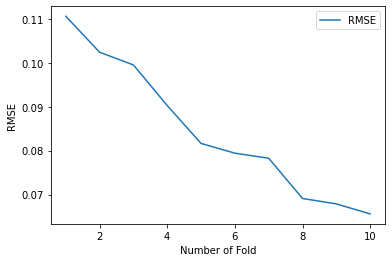

In [18]:
# Fourth Technology - Neural Networks -3

# Appling K-fold Cross-Validation to the NN  
kf = KFold(n_splits=10, random_state=None)      # Setting the number of fold
kfold = kf.split(X_train_scaled,y_train)         # Split the data  
rmse_1 = []                                      # Creating a tuple for storage training result
for k, (train,test) in enumerate(kfold):         # Creating a for loop to test the NN model in each K fold
    model_nn.fit(X_train_scaled,y_train,epochs=200,batch_size=32,callbacks=[monitor],verbose=0)    # Fit the training data into the NN and training it
    prediction_nn = model_nn.predict(X_test_scaled)                    # Predict the target value with test data 
    rmse_1.append(np.sqrt(mean_squared_error(prediction_nn,y_test)))    # calculate the RMSE between predict value and actual value
  
# Creating a table to show the results 
df_nn=pd.DataFrame({'Number of Fold':[1,2,3,4,5,6,7,8,9,10],'rmse':rmse_1})        # Creating a dataframe to storage all the data
display(df_nn)
RMSE_nn = np.average(rmse_1)
print(f"Average RMSE Score: {np.average(rmse_1)}")

# Visualize the results
sns.lineplot(x='Number of Fold',y='rmse',data=df_nn,label='RMSE')  # ploting a a line to show the RMSE change for training results 
plt.ylabel('RMSE')
plt.show()

# Comparing the Performance of each model

In [19]:
# Final Results shows each 
# Creating a table to show the final result of each techonolgy
df_final=pd.DataFrame({'Technology':['Linear Regression','Decision Tree Regression','Random Forest Regression','Neural Network'],'RMSE':[RMSE_linear,RMSE_tree,RMSE_rf,RMSE_nn]})
display(df_final)

,Technology,RMSE
0,Linear Regression,0.069601
1,Decision Tree Regression,0.052885
2,Random Forest Regression,0.045733
3,Neural Network,0.084463
